In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import pandas as pd
import opensmile
from sklearn import preprocessing

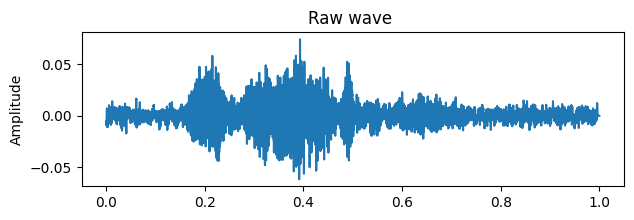

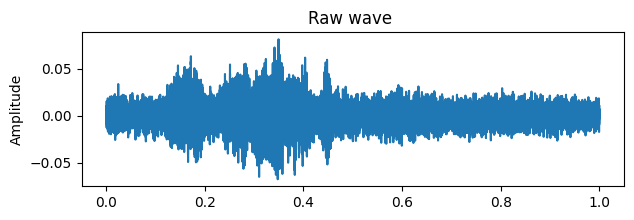

In [5]:
def plot_time_series(data):
    # FROM https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6
    fig = plt.figure(figsize=(7, 2))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()
    
def shift_manipulate(data, sampling_rate, shift_max, shift_direction):
    # FROM https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6
    # shift by max of shift_max seconds
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data


# FROM https://github.com/sleekEagle/audio_processing/blob/master/mix_noise.py

#SNR in dB
#given a signal and desired SNR, this gives the required AWGN what should be added to the signal to get the desired SNR
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

def add_shift_noise(data, samplerate, shift_ms=0.5, snr=10):
    shifted_data = shift_manipulate(data, samplerate, shift_ms, 'both')
    shifted_noise_data = shifted_data+get_white_noise(shifted_data, snr)
    return shifted_noise_data

data, samplerate = sf.read('../CREMA-D/AudioWAV/1040_MTI_SAD_XX.wav')
shifted_noise_data = add_shift_noise(data, samplerate, 0.5, 5)


plot_time_series(data)

plot_time_series(shifted_noise_data)
ipd.Audio(shifted_noise_data, rate=samplerate)

In [4]:
voice_train = pd.read_pickle("../audio_tables/voice_train_split_df")
voice_train

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm,intendedEmo,voiceVote
588,100589,0,5,0,0,0,4,1008_IEO_DIS_HI,9,0.555556,...,55.790186,-1.000000,48.255774,-1.000000,-1.000000,-1.000000,65.208201,58.974359,D,D
3985,103986,0,0,4,0,2,3,1049_ITS_FEA_XX,9,0.444444,...,58.745081,-1.000000,-1.000000,70.706379,-1.000000,40.389272,55.033890,60.439560,F,F
2209,102210,0,4,3,0,2,0,1028_IEO_DIS_MD,9,0.444444,...,34.616499,-1.000000,26.332053,40.242191,-1.000000,42.746855,-1.000000,31.395349,D,D
7439,107440,5,4,0,0,0,0,1091_WSI_ANG_XX,9,0.555556,...,44.634637,28.913787,64.285699,-1.000000,-1.000000,-1.000000,-1.000000,37.681159,A,A
2320,102321,7,0,0,1,0,0,1029_MTI_ANG_XX,8,0.875000,...,82.052019,81.371852,-1.000000,-1.000000,86.813187,-1.000000,-1.000000,84.167518,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,101133,9,1,0,0,1,0,1014_WSI_ANG_XX,11,0.818182,...,75.064337,74.963612,78.571429,-1.000000,-1.000000,72.463768,-1.000000,78.571429,A,A
883,100884,0,1,0,0,8,2,1011_WSI_NEU_XX,11,0.727273,...,51.277296,-1.000000,0.000000,-1.000000,-1.000000,63.423958,28.329298,51.428571,N,N
2028,102029,8,1,0,0,1,0,1025_WSI_ANG_XX,10,0.800000,...,52.150185,52.803014,86.956522,-1.000000,-1.000000,12.121212,-1.000000,58.007705,A,A
5222,105223,1,4,2,0,1,0,1064_TSI_DIS_XX,8,0.500000,...,41.307659,32.467532,48.717186,26.562500,-1.000000,50.000000,-1.000000,43.750000,D,D


In [48]:
train_files = list(voice_train.fileName)

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
    )

voice_train_os_shno = pd.DataFrame()
indexs = []
for filename in train_files:
    indexs.append(filename + '.wav')
    data, samplerate = sf.read(f'../CREMA-D/AudioWAV/{filename}.wav')
    shifted_noise_data = add_shift_noise(data, samplerate, 0.5, 5)
    
    smile_output = smile.process_signal(
        shifted_noise_data,
        samplerate,
    )
    if len(voice_train_os_shno) == 0:
        voice_train_os_shno = smile_output
    else:
        voice_train_os_shno = pd.concat([voice_train_os_shno,smile_output])
voice_train_os_shno.index=indexs
voice_train_os_shno

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
1008_IEO_DIS_HI.wav,1.511907,0.411411,0.927928,0.866690,0.906732,1.149599,0.040043,0.242867,0.282910,0.823127,...,5.575197,0.498400,1.949211,1.948917,20.000000,0.494244,98.242935,60.624363,93.946098,55.011364
1049_ITS_FEA_XX.wav,0.165952,0.291005,0.031746,0.409350,0.441043,0.482829,0.031693,0.041786,0.073479,0.391748,...,5.082025,0.705621,1.715488,1.734143,-19.248610,0.454046,92.952705,42.273438,83.747292,38.212139
1028_IEO_DIS_MD.wav,0.607390,0.228310,0.164384,0.607529,0.640831,0.780649,0.033303,0.139817,0.173120,0.575507,...,4.797387,0.468465,2.166230,2.127150,18.219484,0.492420,105.068970,43.678589,108.947723,51.711361
1091_WSI_ANG_XX.wav,0.811090,0.405405,0.930502,0.596126,0.627256,0.762999,0.031130,0.135743,0.166873,0.568136,...,4.487999,0.456134,1.969148,1.958479,19.852146,0.486364,106.501938,66.185005,95.886230,54.967575
1029_MTI_ANG_XX.wav,4.073178,0.849673,0.797386,2.101746,2.194600,2.677771,0.092854,0.483171,0.576025,2.001900,...,3.912015,0.472779,1.716699,1.721910,-19.976849,0.618466,88.259430,40.733124,85.611336,34.522633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014_WSI_ANG_XX.wav,3.464207,0.270270,0.935811,1.483320,1.579105,1.888928,0.095785,0.309823,0.405608,1.402789,...,5.523211,0.580665,1.982471,2.005702,-19.133600,0.477673,106.716942,46.463833,105.859612,55.111851
1011_WSI_NEU_XX.wav,0.461446,0.230769,0.947552,0.400570,0.416290,0.477937,0.015720,0.061648,0.077367,0.376888,...,5.101974,0.553296,1.728061,1.716335,19.733608,0.500659,82.095383,39.252136,82.946556,42.622139
1025_WSI_ANG_XX.wav,1.162369,0.688995,0.899522,0.818641,0.880910,1.032713,0.062269,0.151803,0.214072,0.763587,...,5.141496,0.541618,1.705937,1.695904,19.815403,0.586116,86.429535,56.762192,91.319016,51.146713
1064_TSI_DIS_XX.wav,0.542534,0.779412,0.979412,0.477193,0.495109,0.539760,0.017915,0.044651,0.062566,0.453702,...,5.148374,0.547376,1.876902,1.880505,-19.996498,0.451657,99.515114,42.375599,91.118439,56.041180


In [2]:
def extract_opensmile_features(voice_data):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.ComParE_2016,
        feature_level=opensmile.FeatureLevel.Functionals,
    )
    return smile.process_files(['./CREMA-D/AudioWAV/'+name+'.wav' for name in list(voice_data.fileName)])

def preprocess_audio_df(voice_data, labelencoder, scaler):
    voice_data_os = extract_opensmile_features(voice_data)
    
    voice_data_os.index = [i[0].split("/")[-1] for i in voice_data_os.index]
    voice_data_os["intendedEmo"] = list(voice_data.intendedEmo)
    
    voice_data_os["intendedEmo"] = labelencoder.fit_transform(voice_data_os["intendedEmo"])
    
    
    normalised_voice_data_os = voice_data_os.drop(columns=["intendedEmo"])
    normalised_voice_data_os.values[:] = scaler.fit_transform(voice_data_os.drop(columns=["intendedEmo"]))
    normalised_voice_data_os["intendedEmo"] = voice_data_os["intendedEmo"]
    return normalised_voice_data_os

In [8]:
def gen_shift_noise_data(files, snr=5):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.ComParE_2016,
        feature_level=opensmile.FeatureLevel.Functionals,
        )

    voice_os_shno = pd.DataFrame()
    indexs = []
    for filename in files:
        indexs.append(filename + '.wav')
        data, samplerate = sf.read(f'../CREMA-D/AudioWAV/{filename}.wav')
        shifted_noise_data = add_shift_noise(data, samplerate, 0.5, snr)

        smile_output = smile.process_signal(
            shifted_noise_data,
            samplerate,
        )
        if len(voice_os_shno) == 0:
            voice_os_shno = smile_output
        else:
            voice_os_shno = pd.concat([voice_os_shno,smile_output])
    voice_os_shno.index=indexs
    
    scaler = preprocessing.StandardScaler()
    stand_voice_os_shno = voice_os_shno
    stand_voice_os_shno.values[:] = scaler.fit_transform(voice_os_shno)
    return stand_voice_os_shno


In [9]:
train_files = list(voice_train.fileName)
stand_voice_train_os_shno5 = gen_shift_noise_data(train_files, 5)

stand_voice_train_os = pd.read_pickle("../audio_tables/voice_train_os_clean_stand_df")
stand_voice_train_os_shno5["intendedEmo"] = stand_voice_train_os.intendedEmo
stand_voice_train_os_shno5

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,intendedEmo
1008_IEO_DIS_HI.wav,0.243094,1.229555,-0.415441,-0.013985,-0.040341,0.021070,-0.323975,0.191993,0.097520,-0.005019,...,-0.528430,0.278158,0.332618,-1.003179,-0.750393,-0.736716,-0.596336,-0.013431,0.143223,1
1049_ITS_FEA_XX.wav,-0.914552,-0.038562,-0.790449,-0.842708,-0.828246,-0.810151,-0.491896,-0.685340,-0.678850,-0.849845,...,0.302996,0.110100,0.105241,1.066747,-0.485393,0.723351,-0.194183,-1.609557,-0.458048,2
1028_IEO_DIS_MD.wav,-0.563037,-1.683153,0.929411,-0.495147,-0.491983,-0.450980,-0.352349,-0.294450,-0.319955,-0.494563,...,-0.640454,1.076964,1.199788,-0.955719,-0.796985,1.044780,-0.225294,0.881805,-0.305423,1
1091_WSI_ANG_XX.wav,-0.375687,-0.662718,1.256605,-0.498052,-0.490419,-0.458973,-0.301569,-0.328611,-0.338684,-0.502407,...,0.440144,-0.374871,-0.405690,1.063755,0.665538,-0.791917,-0.047641,0.055319,-1.262561,0
1029_MTI_ANG_XX.wav,2.564111,1.877807,-1.039261,2.127561,2.076298,1.869234,1.066724,1.115975,1.158728,2.149042,...,0.827923,-0.597089,-0.582904,-1.017695,0.517713,-0.406387,-0.632348,0.287360,-1.464912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014_WSI_ANG_XX.wav,1.907039,0.557633,-0.571561,1.029882,1.047197,0.913113,1.016641,0.452451,0.586995,1.025011,...,0.514030,-0.336496,-0.326135,-1.018016,-0.115396,-0.227495,0.229199,0.260095,1.718725,0
1011_WSI_NEU_XX.wav,-0.669860,0.310807,-1.011601,-0.842595,-0.852891,-0.820279,-0.785807,-0.653683,-0.711025,-0.852427,...,0.201149,1.621366,1.603227,1.066533,-0.001676,0.779443,0.739357,0.832406,0.166499,4
1025_WSI_ANG_XX.wav,-0.100851,1.233903,1.233187,-0.131665,-0.101104,-0.118020,0.259207,-0.154869,-0.079090,-0.128764,...,-0.406304,-0.041821,-0.080202,1.061233,0.200863,0.069410,-0.729507,-0.356282,-0.938142,0
1064_TSI_DIS_XX.wav,-0.580604,2.367235,-1.068560,-0.722685,-0.730508,-0.733591,-0.662007,-0.675367,-0.704541,-0.715245,...,-0.694511,-0.110010,-0.081977,-1.015194,-0.416851,0.234470,-0.102175,0.040454,-0.293757,1


In [10]:
pd.to_pickle(stand_voice_train_os_shno5, "../audio_tables/voice_train_os_shno5_stand_df")

In [6]:
train_files = list(voice_train.fileName)
stand_voice_train_os_shno10 = gen_shift_noise_data(train_files, 10)

stand_voice_train_os = pd.read_pickle("../audio_tables/voice_train_os_clean_stand_df")
stand_voice_train_os_shno10["intendedEmo"] = stand_voice_train_os.intendedEmo
stand_voice_train_os_shno10

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,intendedEmo
1008_IEO_DIS_HI.wav,0.248297,0.512852,0.180678,0.230186,0.187417,0.168000,0.059499,0.127662,0.129943,0.238376,...,0.632509,0.493823,0.469755,0.995478,0.356346,0.525868,0.544598,0.451566,0.385985,1
1049_ITS_FEA_XX.wav,0.011984,0.138197,0.997457,0.072127,0.060873,0.039114,0.038542,0.017597,0.024769,0.077744,...,0.305860,0.257442,0.240409,1.000000,0.492795,0.262380,0.148066,0.174067,0.237869,2
1028_IEO_DIS_MD.wav,0.093831,0.146789,0.952395,0.135115,0.117328,0.095633,0.071440,0.064836,0.075607,0.134099,...,0.249672,0.569565,0.557123,0.003033,0.594554,0.409109,0.432586,0.566394,0.352885,1
1091_WSI_ANG_XX.wav,0.126336,0.418901,0.925329,0.130246,0.116006,0.094252,0.081285,0.063620,0.076848,0.133049,...,0.411401,0.297117,0.291050,0.023294,0.474566,0.465606,0.517939,0.438943,0.323657,0
1029_MTI_ANG_XX.wav,0.709909,0.814175,0.000000,0.659602,0.554389,0.446936,0.210847,0.266535,0.292422,0.665114,...,0.393376,0.540730,0.529868,0.005869,0.531956,0.495632,0.398943,0.652537,0.414114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014_WSI_ANG_XX.wav,0.560469,0.369932,0.040653,0.444455,0.394777,0.297661,0.233788,0.152982,0.194538,0.455284,...,0.510390,0.638263,0.614773,0.998484,0.413648,0.460865,0.352957,0.642953,0.508955,0
1011_WSI_NEU_XX.wav,0.064303,0.512831,0.007012,0.064710,0.050488,0.038144,0.019442,0.026832,0.028621,0.064750,...,0.554307,0.451029,0.457584,0.063986,0.185937,0.463865,0.426743,0.417860,0.394144,4
1025_WSI_ANG_XX.wav,0.186302,0.658509,0.993167,0.213252,0.191476,0.143838,0.129009,0.077390,0.100757,0.214068,...,0.438365,0.317671,0.282024,0.944829,0.804801,0.293181,0.223590,0.389927,0.281901,0
1064_TSI_DIS_XX.wav,0.084075,0.824352,0.061935,0.090919,0.071653,0.049238,0.023662,0.025346,0.028275,0.092896,...,0.443311,0.224995,0.219800,0.029276,0.424879,0.325040,0.301618,0.267901,0.172121,1


In [7]:
pd.to_pickle(stand_voice_train_os_shno10, "../audio_tables/voice_train_os_shno10_stand_df")